# Regression Project

Reviewing regression from Jamie Chan's Machine Learning with Python for Beginners

In [80]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

%matplotlib inline

In [3]:
df = pd.read_csv("./Data/reviews.csv")

In [4]:
df.head()

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
1,productivity,155,1547,204.0,-0.50,72,2.07
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80


In [6]:
df.isnull().sum()

Category                   0
No Of Reviews              0
No Of Installs             0
Size                      28
Price                      0
Days since Last Update     0
Rating                     0
dtype: int64

array([[<Axes: title={'center': 'No Of Reviews'}>,
        <Axes: title={'center': 'No Of Installs'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Days since Last Update'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

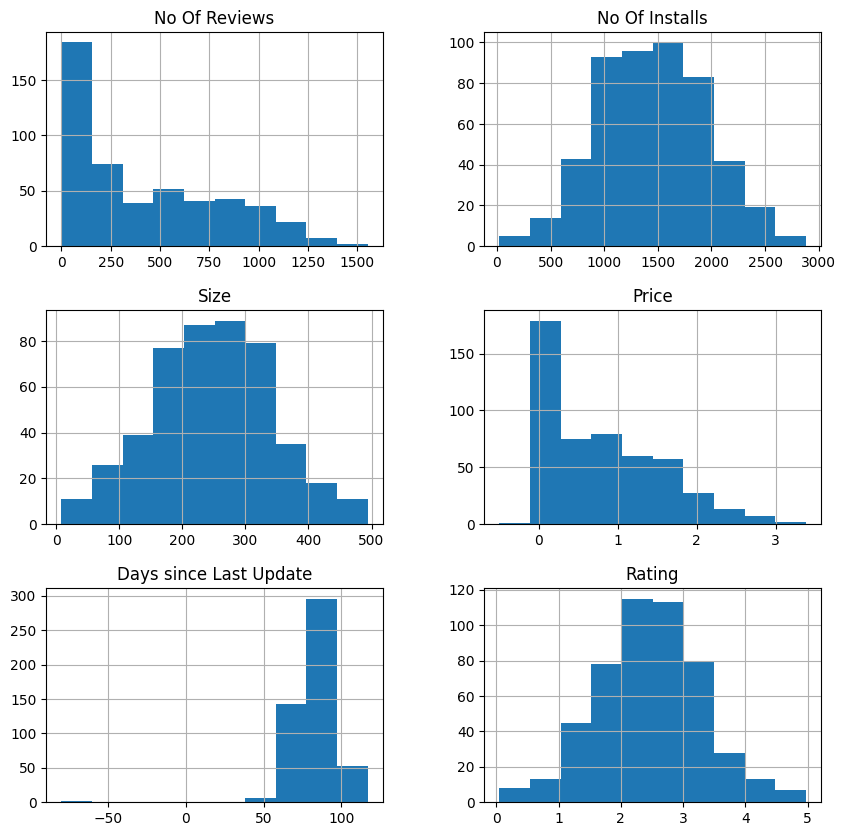

In [8]:
df.hist(figsize = (10, 10))

In [9]:
df.describe()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
count,500.000000,500.00000,472.000000,500.000000,500.000000,500.000000
mean,426.578000,1456.22200,247.870763,0.772200,83.274000,2.462260
std,366.600332,506.51664,95.105050,0.752114,14.960433,0.840859
min,0.000000,23.00000,8.000000,-0.500000,-80.000000,0.050000
25%,113.750000,1072.50000,184.000000,0.000000,76.000000,1.907500
50%,273.000000,1447.50000,249.000000,0.645000,84.000000,2.480000
75%,716.250000,1783.75000,312.250000,1.270000,92.000000,3.020000
max,1552.000000,2880.00000,494.000000,3.380000,117.000000,4.970000


Note that minimum of Price and Days since Last Update are negative. This needs more investigation.

In [10]:
negativePrice = df[df['Price'] < 0]
negativeDaysSinceLastUpdate = df[df['Days since Last Update'] < 0]

In [11]:
negativePrice

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
1,productivity,155,1547,204.0,-0.5,72,2.07


In [12]:
negativeDaysSinceLastUpdate

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
11,productivity,201,2006,NaN,0.00,-68,1.91
88,games,59,587,335.0,1.58,-80,2.08


In [15]:
df = df[(df['Price'] >= 0) & (df['Days since Last Update'] >= 0)]
df.shape

(497, 7)

In [19]:
# Test-train-split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [27]:
# Check correlations
X_train.iloc[:, 1:].corr()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update
No Of Reviews,1.000000,0.514130,-0.018121,-0.086976,-0.078577
No Of Installs,0.514130,1.000000,-0.004516,-0.018700,-0.054035
Size,-0.018121,-0.004516,1.000000,-0.038070,-0.002414
Price,-0.086976,-0.018700,-0.038070,1.000000,-0.031706
Days since Last Update,-0.078577,-0.054035,-0.002414,-0.031706,1.000000


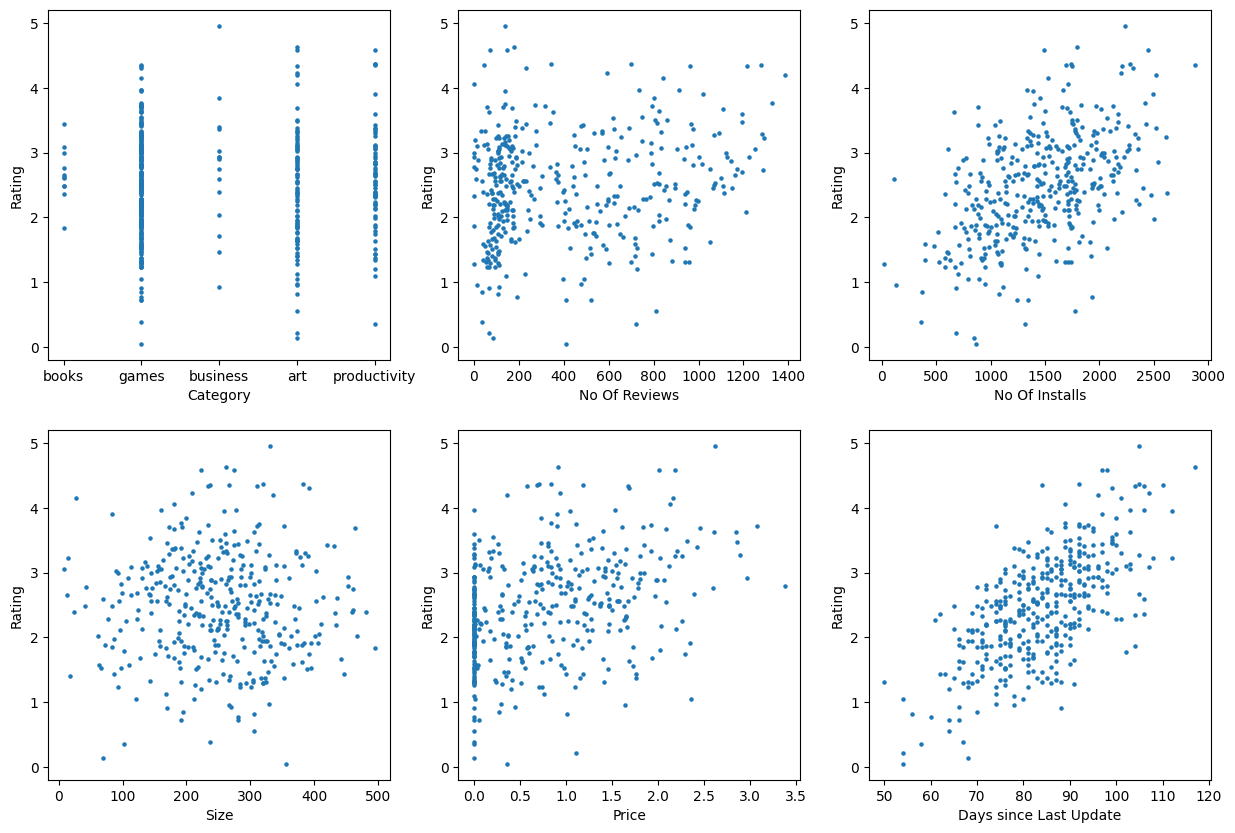

In [29]:
# Create scatter plots
columns = X_train.columns

fig, axs = plt.subplots(2, 3, figsize = (15, 10))

idx = 0

for row in range(0, 2):
    for col in range(0, 3):
        axs[row, col].scatter(X_train[columns[idx]], y_train, s = 5)
        axs[row, col].set_xlabel(columns[idx])
        axs[row, col].set_ylabel('Rating')
        idx += 1

## Pre-processing

In [44]:
# Separate numeric and categorical columns
num_col = X_train.columns[1:]
cat_col = X_train.columns[0]

In [35]:
imp = SimpleImputer(strategy='mean')

# fit_transform the imputer
tf_num = imp.fit_transform(X_train[num_col])

In [36]:
scaler = StandardScaler()
tf_num = scaler.fit_transform(tf_num)

In [46]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
tf_cat = ohe.fit_transform(X_train[[cat_col]])

In [47]:
# Combine back all transformed data
X_train_transformed = np.concatenate((tf_num, tf_cat), axis = 1)

print(X_train_transformed[0])

[-1.14922     1.1215984  -1.13561632  0.0732169   0.01224327  1.
  0.          0.          0.        ]


## Training

In [50]:
model = LinearRegression()

model.fit(X_train_transformed, y_train)

print(model.coef_)
print(model.intercept_)

[-0.01263761  0.44527099  0.00512994  0.33109219  0.57813034  0.15265019
 -0.09387284  0.01393827  0.09654561]
2.4437510828137157


### Evaluation

In [55]:
y_train_pred = model.predict(X_train_transformed)

rmse = root_mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)

0.313351772053805
0.8579549928483164


### Transform the test set for evaluations

In [56]:
test_tf_num = imp.transform(X_test[num_col])
test_tf_num = scaler.transform(test_tf_num)


In [57]:
test_tf_cat = ohe.transform(X_test[[cat_col]])

In [58]:
X_test_transformed = np.concatenate((test_tf_num, test_tf_cat), axis = 1)

In [59]:
y_test_pred = model.predict(X_test_transformed)

In [60]:
rmse = root_mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [61]:
print(rmse)
print(r2)

0.28455529875001995
0.8958679954075467


Relatively high R**2 score with small RMSE indicates a good fit using the model. In summary, the error is small, and most of it can be explained by the model.

## PipeLine

In [63]:
num_preprocessing = Pipeline(
    [('imp', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler())]
)

In [75]:
full_preprocessing = ColumnTransformer(
    [
        ('num', num_preprocessing, num_col),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), [cat_col])
    ]
)

In [76]:
final_pipeline = Pipeline(
    [
        ('pre', full_preprocessing),
        ('model', LinearRegression())
    ]
)

In [77]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['No Of Reviews', 'No Of Installs', 'Size', 'Price',
       'Days since Last Update'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Category'])])),
                ('model', LinearRegression())])

In [78]:
y_train_pred = final_pipeline.predict(X_train)

rmse = root_mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)

0.313351772053805
0.8579549928483164


In [79]:
y_test_pred = final_pipeline.predict(X_test)

rmse = root_mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

0.28455529875001995
0.8958679954075467


## Cross-Validation

In [82]:
scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")

neg_rmse_cv = scores.mean()

print(-neg_rmse_cv)

0.32508192142610537


In [83]:
scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="r2")

r2_cv = scores.mean()

print(r2_cv)

0.8409908098104693
